# 탐색적 데이터 분석
* 데이터를 수집하고, 수집된 데이터를 다양한 방면에서 관찰하고 이해하는 과정
* 데이터를 분석하기 전에 통계적으로 해석하거나 그래프를 그려 시각화하고 데이터를 직관화하는 과정

## 필요한 이유

* 데이터가 가지고 있는 분포와 값을 다양한 관점에서 바라봄으로써 데이터가 가지고 있는 잠재적 현상을 이해할 수 있음
* 데이터를 다양한 각도에서 살펴보아 미처 발견하지 못했던 새로운 패턴을 발견
* 데이터를 이해하는 것이 탐색적 데이터 분석의 최종 목표

## 탐색적 데이터 분석 과정
1. 전체적인 데이터 분석
 - 데이터 항목의 개수, 속성 목록, NaN 값 등과 데이터 가공 과정에서 데이터 오류나 누락 등이 없는지 확인
 - 데이터를 구성하는 각 속성 값이 미리 예측한 범위와 분포를 가지는지 확인
 
2. 이상값 확인
 - 데이터에 이상치를 발견했다면, 이상치가 왜 발생했는지를 확인할 필요가 있음. 이상치를 발견했다면 어떻게 처리할지 고민해야함(제거, 대체, 유지 등)
 
3. 속성 간의 관계 분석하기
 - 서로 상관관계를 가지는 속성들의 조합을 찾아내는 것 속성의 종류에는 두가지가 있음
![img8](./img/img9.PNG)
 


데이터
--
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw
- 위 자료는 전력거래소에서 받은 자료임
- 이 파일을 현재 작업중인 (쥬피터 노트북이 실행되는) 폴더 아래에 data 폴더를 만들고 data 폴더로 복사한다

필요한 라이브러리(모듈) 설치
--

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

데이터 읽기
--

In [4]:
power_data = pd.read_excel('data/시도별_용도별.xls')
print(power_data.shape)

(19, 28)


In [5]:
power_data

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
5,광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
6,대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
7,대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
8,부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358
9,서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,...,163688,4395,11425,46225,20182,17656,132707,2875,1938107,46298158


In [6]:
type(power_data)

pandas.core.frame.DataFrame

In [7]:
power_data.columns

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

In [8]:
power = power_data.set_index('구분')

In [9]:
power = power.drop(['합계', '개성'], errors='ignore')

In [10]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주거용     17 non-null     int64
 1   공공용     17 non-null     int64
 2   서비스업    17 non-null     int64
 3   업무용합계   17 non-null     int64
 4   농림어업    17 non-null     int64
 5   광업      17 non-null     int64
 6   제조업     17 non-null     int64
 7   식료품제조   17 non-null     int64
 8   섬유,의류   17 non-null     int64
 9   목재,나무   17 non-null     int64
 10  펄프,종이   17 non-null     int64
 11  출판,인쇄   17 non-null     int64
 12  석유,화확   17 non-null     int64
 13  의료,광학   17 non-null     int64
 14  요업      17 non-null     int64
 15  1차금속    17 non-null     int64
 16  조립금속    17 non-null     int64
 17  기타기계    17 non-null     int64
 18  사무기기    17 non-null     int64
 19  전기기기    17 non-null     int64
 20  영상,음향   17 non-null     int64
 21  자동차     17 non-null     int64
 22  기타운송    17 non-null     int64
 23  가구및기타   17 non-null  

데이터 특성 보기
--
- boxplot
- barplot
- histogram

## 박스플롯
* 최댓값, 최솟값, 중앙값, 사분편차를 사용하여 자료의 측정값들이 어떤 모양으로 분포되어 있으며, 극단값들은 어떠한지 등을 쉽게 알 수 있도록 하는 그림

![img6](./img/img6.png)

한글 폰트 설정 (맥, 윈도우, 리눅스)
--

In [11]:
#sudo apt-get install fonts-nanum* -qq

In [12]:
import platform
from matplotlib import font_manager, rc
plt.rc('font', family='DejaVu Sans')

In [13]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=font_manager.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 313
nanum_font number: 31


In [14]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    
    rc('font', family='NanumGothic')

In [15]:
power.describe()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,...,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01
mean,3.912786e+06,1.388502e+06,8.291312e+06,9.679813e+06,9.400665e+05,102720.176471,1.523205e+07,6.636738e+05,6.623886e+05,113237.000000,...,6.199825e+05,28781.235294,3.412887e+05,2.805870e+06,1.053153e+06,2.600299e+05,2.005222e+05,33137.000000,1.627484e+07,2.986743e+07
std,4.310227e+06,1.298531e+06,8.708909e+06,9.981623e+06,1.010972e+06,122502.337918,1.524290e+07,6.333206e+05,9.612365e+05,192034.155445,...,9.142491e+05,75569.163261,3.788489e+05,6.246070e+06,1.031256e+06,5.260199e+05,4.450945e+05,38105.462924,1.598920e+07,2.618055e+07
min,3.849030e+05,2.996750e+05,6.454240e+05,9.450990e+05,1.515000e+04,2898.000000,2.415370e+05,1.102110e+05,3.497000e+03,1324.000000,...,1.167000e+03,0.000000,7.710000e+02,0.000000e+00,7.730000e+02,0.000000e+00,1.743000e+03,743.000000,1.588755e+06,2.918758e+06
25%,1.940933e+06,8.263960e+05,3.955921e+06,4.910602e+06,7.460800e+04,14019.000000,2.910768e+06,2.041710e+05,7.589500e+04,6782.000000,...,7.797000e+04,4395.000000,8.360900e+04,4.622500e+04,1.134480e+05,1.765600e+04,1.339200e+04,2875.000000,2.988274e+06,1.538637e+07
50%,2.326183e+06,1.089613e+06,5.690659e+06,6.654683e+06,6.071390e+05,71529.000000,1.236782e+07,5.329430e+05,3.338460e+05,27998.000000,...,1.988470e+05,7240.000000,1.785020e+05,4.200050e+05,6.128980e+05,6.812700e+04,4.181400e+04,19725.000000,1.258230e+07,2.451531e+07
75%,3.856852e+06,1.400421e+06,7.582169e+06,8.888045e+06,1.747462e+06,139856.000000,2.145393e+07,9.327430e+05,7.316510e+05,72680.000000,...,7.825700e+05,14319.000000,4.289060e+05,1.124564e+06,2.156059e+06,1.239350e+05,1.327070e+05,46038.000000,2.462327e+07,3.464786e+07
max,1.658771e+07,5.533662e+06,3.343455e+07,3.896821e+07,3.096126e+06,398287.000000,5.660333e+07,2.544420e+06,3.780171e+06,639429.000000,...,3.613798e+06,317244.000000,1.125141e+06,2.451964e+07,2.977165e+06,2.048646e+06,1.833112e+06,133041.000000,5.929194e+07,1.148479e+08


In [16]:
font_manager._rebuild() #font manager 다시 불러오기

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(1, 0, '주거용'),
  Text(2, 0, '공공용'),
  Text(3, 0, '서비스업'),
  Text(4, 0, '업무용합계'),
  Text(5, 0, '농림어업'),
  Text(6, 0, '광업'),
  Text(7, 0, '제조업'),
  Text(8, 0, '식료품제조'),
  Text(9, 0, '섬유,의류'),
  Text(10, 0, '목재,나무'),
  Text(11, 0, '펄프,종이'),
  Text(12, 0, '출판,인쇄'),
  Text(13, 0, '석유,화확'),
  Text(14, 0, '의료,광학'),
  Text(15, 0, '요업'),
  Text(16, 0, '1차금속'),
  Text(17, 0, '조립금속'),
  Text(18, 0, '기타기계'),
  Text(19, 0, '사무기기'),
  Text(20, 0, '전기기기'),
  Text(21, 0, '영상,음향'),
  Text(22, 0, '자동차'),
  Text(23, 0, '기타운송'),
  Text(24, 0, '가구및기타'),
  Text(25, 0, '재생재료'),
  Text(26, 0, '산업용합계')])

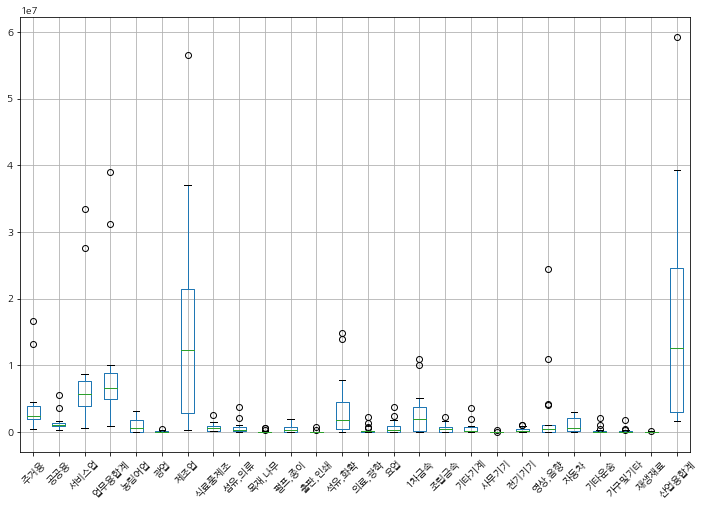

In [17]:
power.drop('합계', axis=1).boxplot(figsize=(12,8))
plt.xticks(rotation=45)

<AxesSubplot:>

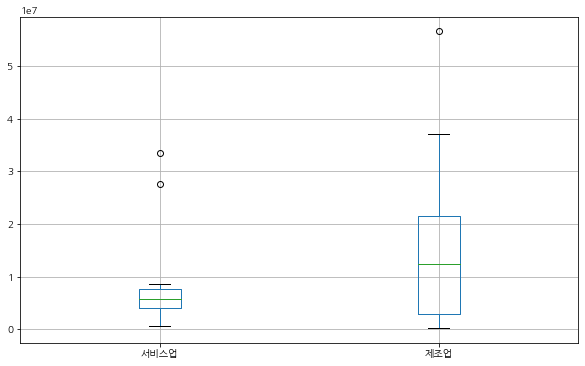

In [18]:
power[['서비스업','제조업']].boxplot(figsize=(10,6))

바 플롯 (수평형)
--

In [19]:
power = power.drop('합계', axis=1)

<AxesSubplot:ylabel='구분'>

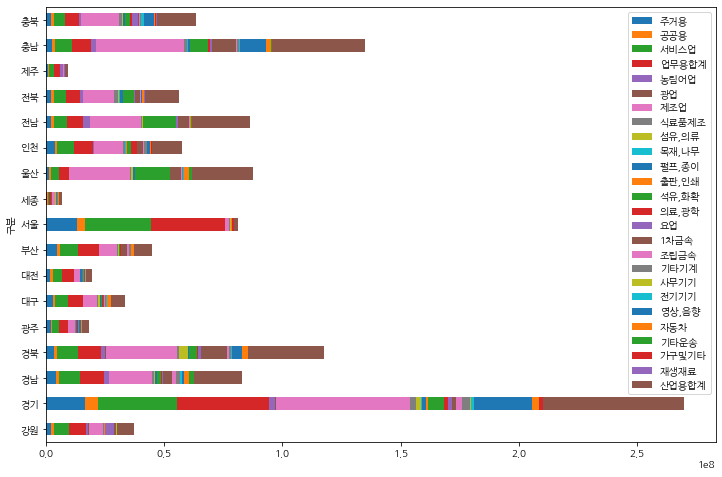

In [20]:
power.plot(kind='barh', figsize=(12,8), stacked=True)

<AxesSubplot:ylabel='구분'>

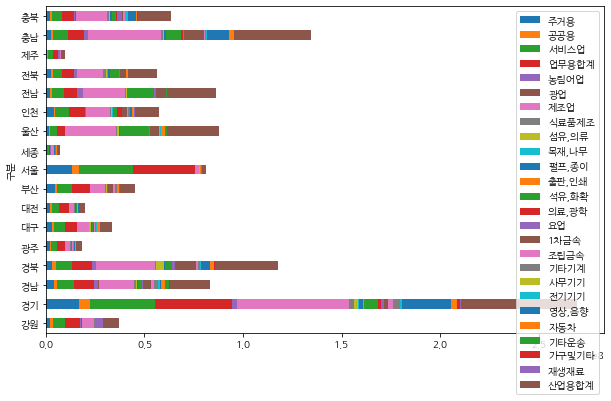

In [21]:
power.plot(kind='barh', figsize=(10,6), stacked=True)

<AxesSubplot:ylabel='구분'>

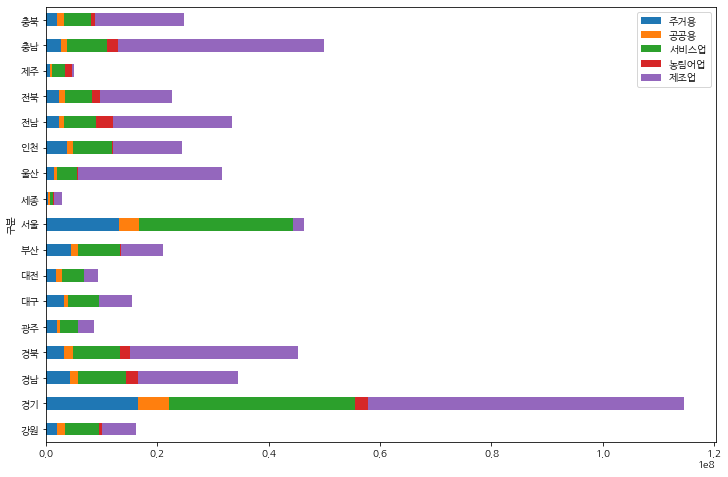

In [22]:
sample = ['주거용', '공공용', '서비스업', '농림어업', '제조업']
power[sample].plot(kind='barh', figsize=(12,8), stacked=True)

<AxesSubplot:ylabel='구분'>

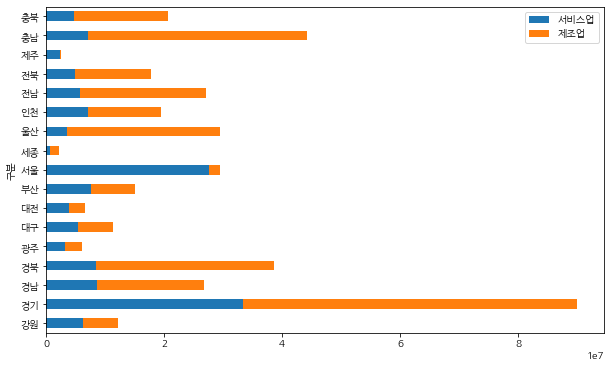

In [23]:
see2 = [ '서비스업','제조업']
power[see2].plot(kind='barh', figsize=(10,6), stacked=True)

In [24]:
power = power[['서비스업', '제조업']]
power.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


히스토그램
--

<AxesSubplot:>

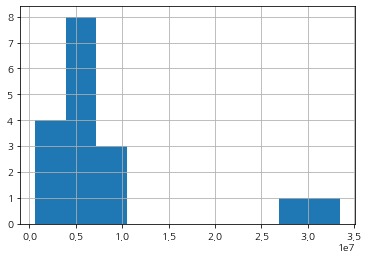

In [25]:
power['서비스업'].hist()

스캐터 플롯
--

In [26]:
print(power.shape)

(17, 2)


In [27]:
n_samples = power.shape[0]
n_samples

17

In [28]:
print(n_samples)

17


Text(0, 0.5, '제조업')

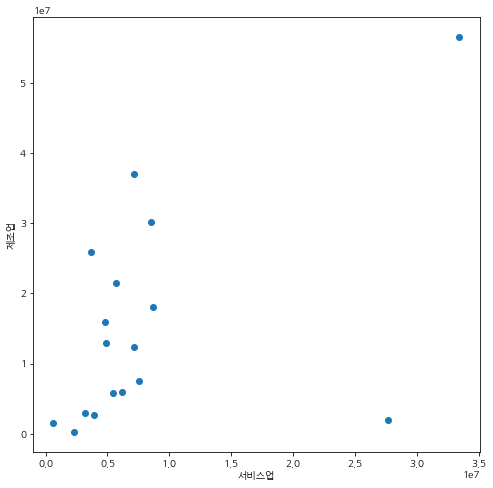

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

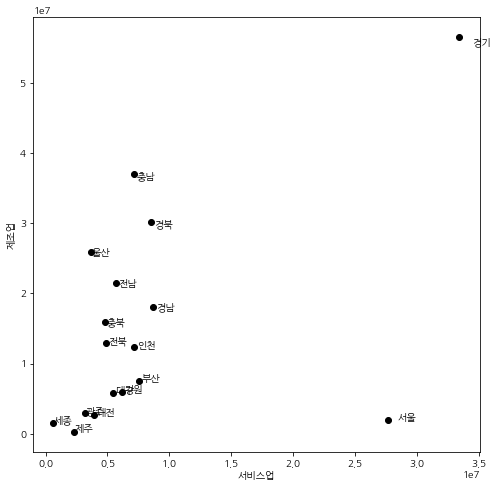

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

In [31]:
power = power.drop(['경기', '서울'])

In [32]:
power

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633
대전,3955921,2608343
부산,7582169,7512588
세종,645424,1502922
울산,3649386,25883132


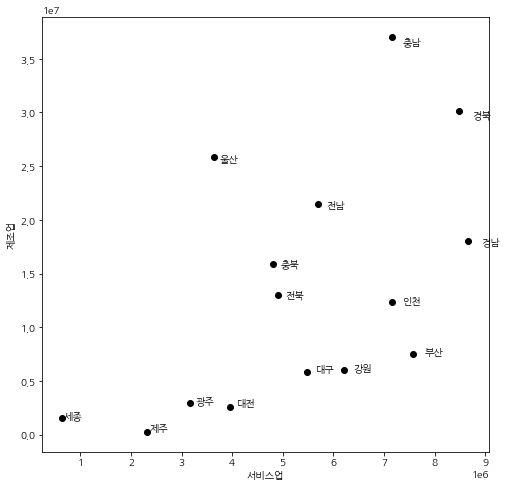

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

## 클러스터링

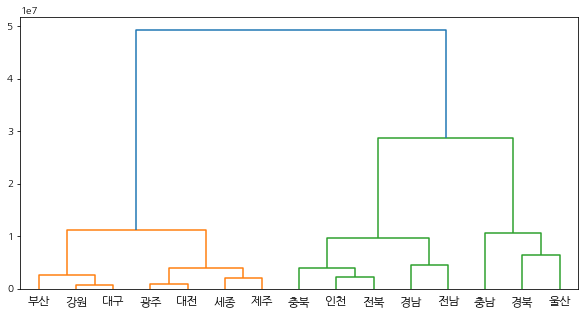

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
link_dist = linkage(power, metric='euclidean', method='ward')  
dendrogram(link_dist, labels=power.index)
plt.show()

In [36]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=6).fit(power)
print(k.n_clusters)

6


In [37]:
power['클러스터'] = k.labels_
power.head(10)

,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,0
경남,8667737,18053778,1
경북,8487402,30115601,3
광주,3174973,2910768,4
대구,5470438,5862633,0
대전,3955921,2608343,4
부산,7582169,7512588,0
세종,645424,1502922,4
울산,3649386,25883132,3


In [38]:
power.drop('클러스터', axis = 1, inplace=True) ; power.head()

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633


In [39]:
centers = k.cluster_centers_ ; centers

array([[ 6418785.33333333,  6459169.        ],
       [ 7179198.        , 19753852.        ],
       [ 7164439.        , 37057955.        ],
       [ 6068394.        , 27999366.5       ],
       [ 2521262.5       ,  1815892.5       ],
       [ 5623124.        , 13739046.33333333]])

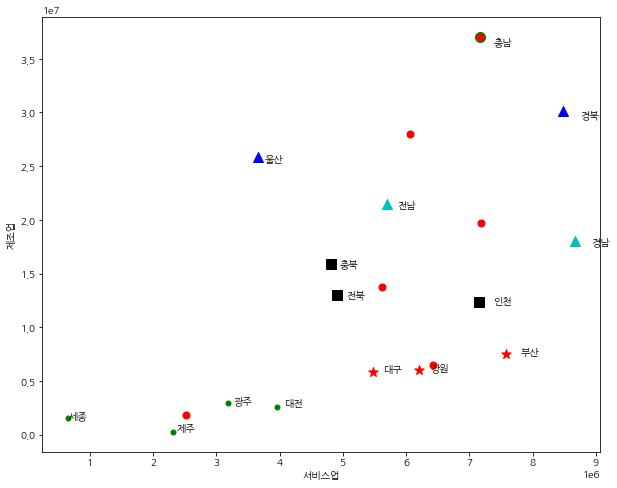

In [40]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
power[['서비스업', '제조업']] = scaler.fit_transform(power[['서비스업', '제조업']])
power

,서비스업,제조업
구분,,
강원,0.393992,-0.676282
경남,1.498349,0.431200
경북,1.417523,1.539632
광주,-0.963503,-0.960380
대구,0.065323,-0.689116
대전,-0.613482,-0.988171
부산,1.011798,-0.537491
세종,-2.097244,-1.089755
울산,-0.750871,1.150686


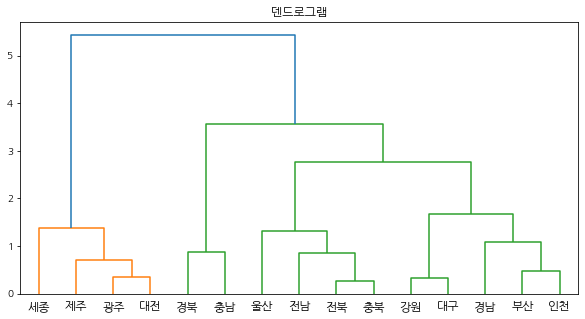

In [42]:
Z = linkage(power, metric='euclidean', method='ward') 
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=power.index)
plt.show()

In [43]:
k = KMeans(n_clusters= 4).fit(power)
centers = k.cluster_centers_

<Figure size 432x288 with 0 Axes>

/home/dilab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dilab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


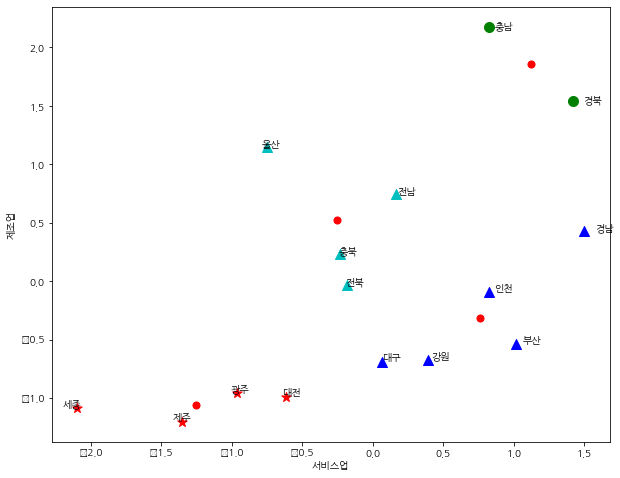

In [44]:
plt.clf()
plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.05, power['제조업'][n]*0.99, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

In [45]:
# 모든 특성 고려
power_data.head().T

,0,1,2,3,4
구분,강원,개성,경기,경남,경북
주거용,1940933,0,16587710,4260988,3302463
공공용,1400421,0,5533662,1427560,1578115
서비스업,6203749,0,33434551,8667737,8487402
업무용합계,7604170,0,38968213,10095297,10065517
농림어업,607139,0,2371347,2141813,1747462
광업,398287,0,317263,95989,224568
제조업,6002286,0,56603327,18053778,30115601
식료품제조,546621,0,2544420,932743,566071
"섬유,의류",13027,0,2109963,346974,3780171


In [46]:
power2 = power_data.set_index('구분')
power2.drop(['업무용합계', '산업용합계', '합계'], axis=1, 
           inplace=True, errors='ignore')
power2.drop(['합계','개성','경기','서울'], inplace=True,errors='ignore')

In [47]:
power2

,주거용,공공용,서비스업,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이",...,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,607139,398287,6002286,546621,13027,19147,24382,...,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418
경남,4260988,1427560,8667737,2141813,95989,18053778,932743,346974,60160,817685,...,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662
경북,3302463,1578115,8487402,1747462,224568,30115601,566071,3780171,72680,361772,...,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104
광주,1954876,565527,3174973,74608,2898,2910768,161072,295922,6782,41827,...,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049
대구,3151904,826396,5470438,69142,5858,5862633,212626,1057342,16215,445646,...,317580,661307,516493,58446,180189,252662,1381273,68127,41814,33616
대전,1872890,954681,3955921,28643,3326,2608343,204171,41687,4311,539332,...,56535,69342,77970,2949,83609,474561,218191,5439,31657,2252
부산,4473510,1305876,7582169,107927,25289,7512588,532943,528513,51980,27240,...,2426694,872952,904149,4913,107717,90644,1046529,231141,49733,13104
세종,384903,299675,645424,69469,16364,1502922,110211,70617,1324,350896,...,32345,11390,26185,14319,33539,170366,79009,0,5132,2603
울산,1487143,489865,3649386,80221,20103,25883132,187738,943299,12286,620457,...,4671005,393469,169132,5053,381602,24165,2367150,1020610,4984,1626


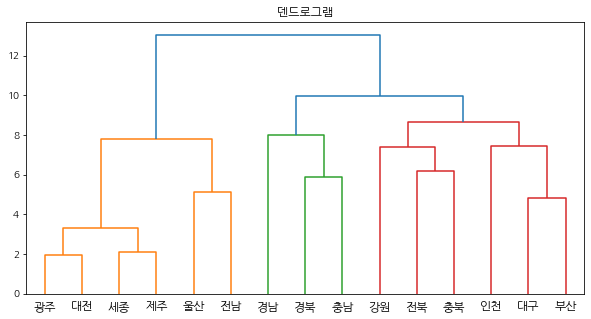

In [48]:
power3 = pd.DataFrame(scaler.fit_transform(power2), columns=power2.columns,
                      index=power2.index)

Z = linkage(power3, metric='euclidean', method='ward') 
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=power3.index)
plt.show()

15


/home/dilab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/dilab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


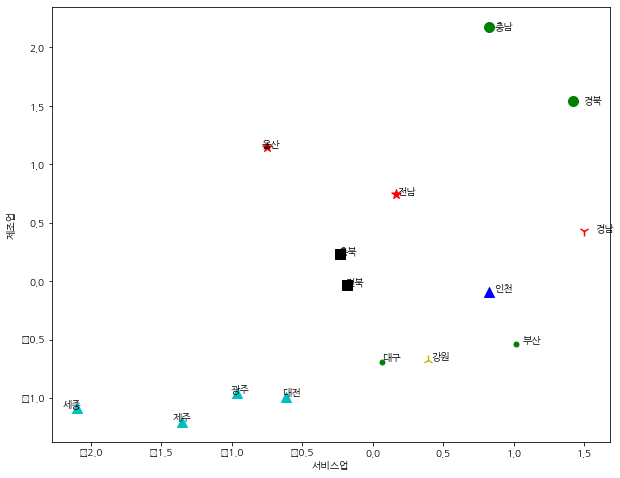

In [49]:
k = KMeans(n_clusters=8).fit(power3)
n_samples = power3.shape[0]
print(n_samples)

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(n_samples):
    label = k.labels_[n]
    plt.scatter(power3['서비스업'][n], power3['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power3['서비스업'][n]*1.05, power3['제조업'][n]*0.99, power3.index[n])
    